In [1]:
# important packages
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
df = pd.read_csv('data_UNM.csv')
df.columns = df.columns.str.strip().str.lower()

In [3]:
# manually add higher education inflation data from 2016 - 2006
df['HEPI'] = [0, 1.8, 2.1, 3.0, 1.6, 1.7, 2.3, 0.9, 2.3, 5.0, 2.8, 5.1]

In [4]:
df['cHEPI'] = np.nan # column to create a cumulative inflation
df['cHEPI'] = np.where(df.year == 2017, 1, df.cHEPI) # 2017 dollar will be constant so equal to 1

In [5]:
# creating cumulative inflation rate
for i in range(1, len(df)):
    df.loc[i, 'cHEPI'] = df.loc[i-1, 'cHEPI'] - df.loc[i, 'HEPI'] / 100

# making percentage
df['cHEPI'] = 1 - df['cHEPI']
df['cHEPI'] = 1 + df['cHEPI']

df.drop([0], inplace = True) # remove 2017


In [6]:
# Adjusting for inflation
expenses = ['instructional_expenses', 'researchal_expenses', 'publical_service', 
            'academical_support', 'studental_service', 'institutionalal_support', 'allal_other']

for var in expenses:
    df[var] = df[var]*df['cHEPI']

In [7]:
# directory to save figure
dir = ('C:\\Users\\rbishwakarma\\Desktop\\value_proposition_in_python\\value_proposition\\figures')

# Figure 5

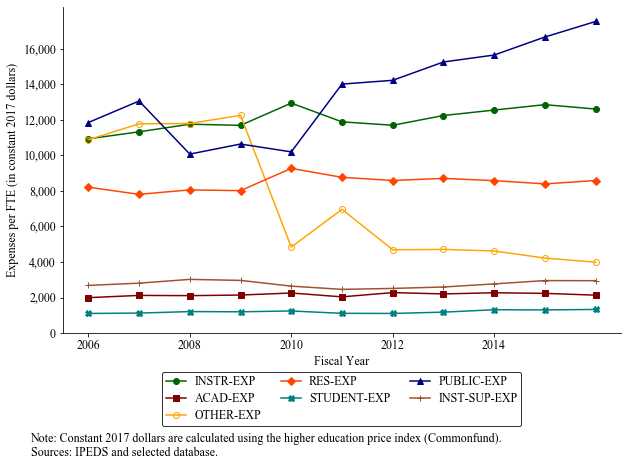

In [8]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
ax.plot(df['year'], df['instructional_expenses'], color='darkgreen',  
               label='INSTR-EXP',
            marker = 'o')


ax.plot(df['year'], df['academical_support'], color='maroon',  
            label='ACAD-EXP',
            marker = 's')

ax.plot(df['year'], df['allal_other'], color='orange',  
               label='OTHER-EXP',
                marker = 'o', markerfacecolor="None")

ax.plot(df['year'], df['researchal_expenses'], color='orangered',  
               label='RES-EXP',
                     marker = 'D')

ax.plot(df['year'], df['studental_service'], color='teal',  
               label='STUDENT-EXP',
                     marker = 'X')

ax.plot(df['year'], df['publical_service'], color='navy',  
               label='PUBLIC-EXP',
                     marker = '^')

ax.plot(df['year'], df['institutionalal_support'], color='sienna',  
               label='INST-SUP-EXP',
                     marker = '+')

# formatting - labels
plt.ylabel('Expenses per FTE (in constant 2017 dollars)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('Fiscal Year', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 16000+1, 2000), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks(np.arange(2006, 2016, 2), 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center", 
           ncol=3, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note: Constant 2017 dollars are calculated using the higher education price index (Commonfund). \n Sources: IPEDS and selected database.'
plt.figtext(0.08, -0.155, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# put comman on y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig(dir+'\\figure5.png', bbox_inches = 'tight')

plt.show()

# Figure 6

In [9]:
df['ratio'] = df['institutionalal_support']/(df['academical_support'] + df['instructional_expenses'])

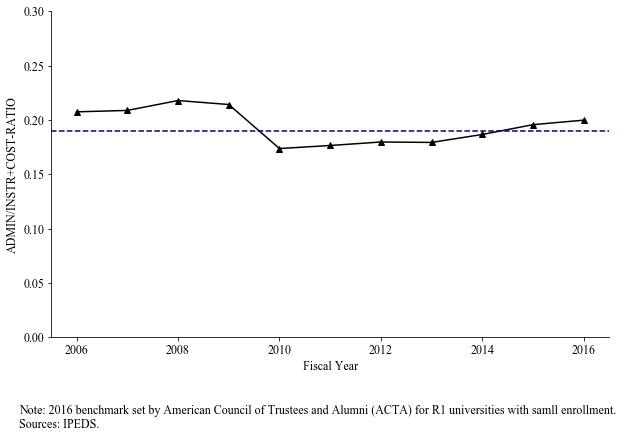

In [10]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
ax.plot(df['year'], df['ratio'], color='black',  
               marker = '^')

# benchmark line
ax.axhline(y=0.19, color='navy', linestyle='--')

# formatting - labels
plt.ylabel('ADMIN/INSTR+COST-RATIO', fontsize = 12, family = 'Times New Roman')
plt.xlabel('Fiscal Year', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 0.3 + 0.05, 0.05), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks(np.arange(2006, 2016 + 1, 2), 
           fontsize = 12, 
           family = 'Times New Roman')

# notes
note = 'Note: 2016 benchmark set by American Council of Trustees and Alumni (ACTA) for R1 universities with samll enrollment. \n Sources: IPEDS.'
plt.figtext(0.08, -0.08, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(dir+'\\figure6.png', bbox_inches = 'tight')

plt.show()

# Figure 7

In [11]:
df = pd.read_csv('peer_universities.csv')

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['unitid', 'institution_name', 'published_in-state_tuition_and_fees_2016-17_ic2016_ay', 'published_in-state_tuition_and_fees_2015-16_ic2015_ay'], dtype='object')

In [13]:
df.rename(columns = {'published_in-state_tuition_and_fees_2016-17_ic2016_ay': 'publishedinstatetuitionandfees20'}
          , inplace = True)

In [14]:
# inflation adjustment
df['publishedinstatetuitionandfees20'] = df['publishedinstatetuitionandfees20'] * 1.018
df.sort_values('publishedinstatetuitionandfees20', ascending = False, inplace=True)


In [15]:
# replace the name of u of colorado - denver
df['institution_name'].replace('University of Colorado Denver/Anschutz Medical Campus', 'University of Colorado Denver', 
                               inplace = True)

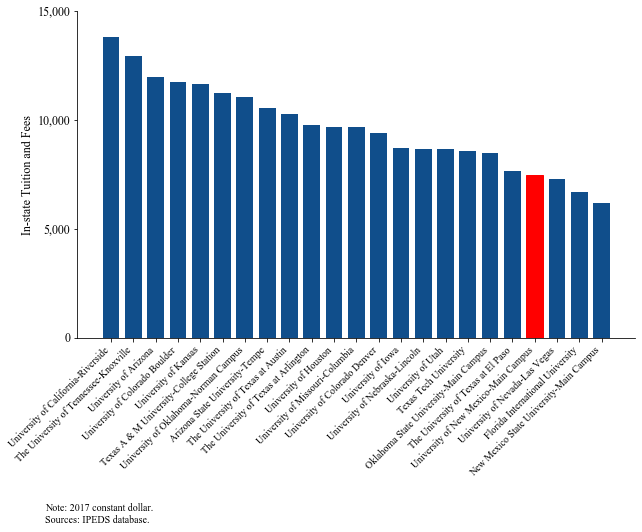

In [16]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
peer = ax.bar(df['institution_name'], df['publishedinstatetuitionandfees20'], 
       color = '#104E8B', edgecolor = 'none' ,width = 0.75)

# formatting
plt.ylabel('In-state Tuition and Fees', fontsize = 12, family = 'Times New Roman')


plt.xticks(df['institution_name'],fontsize = 10, family = 'Times New Roman', 
           rotation=45, horizontalalignment='right') #label of uni 
plt.yticks(np.arange(0, 15000+100, 5000), 
           fontsize = 12, 
           family = 'Times New Roman')
peer[19].set_color('red') # changing color of UNM

# notes
note = 'Note: 2017 constant dollar. \n Sources: IPEDS database.'
plt.figtext(0.08, -0.30, note, wrap=True, horizontalalignment='left', 
            fontsize=10, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# put comman on y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig(dir+'\\figure7.png', bbox_inches = 'tight')
plt.show()

# Figure 8

In [17]:
# creating a dataframe 
data = {'year': [2012, 2013, 2014, 2015, 2016, 2017],
        'tuition_fees': [6049, 6447, 6447, 6664, 6950, 7228],
        'tuition_paid': [1018, 1172, 1222, 1274, 1528, 2232]}

df = pd.DataFrame(data, columns = ['year', 'tuition_fees', 'tuition_paid'])

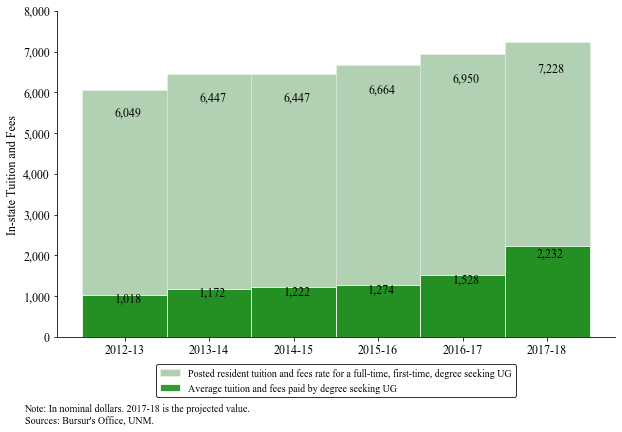

In [18]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
# bar 1
ax.bar(df['year'], df['tuition_fees'], 
       color = 'darkgreen', edgecolor = 'white' ,width = 1, alpha = 0.3,
      label='Posted resident tuition and fees rate for a full-time, first-time, degree seeking UG')
# bar 2
ax.bar(df['year'], df['tuition_paid'], 
       color = 'green', edgecolor = 'white', width = 1, alpha = 0.8,
       label = 'Average tuition and fees paid by degree seeking UG')

# formatting
plt.ylabel('In-state Tuition and Fees', fontsize = 12, family = 'Times New Roman')


plt.xticks([2012, 2013, 2014, 2015, 2016, 2017],
           ['2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'], 
           fontsize = 12, family = 'Times New Roman')
plt.yticks(np.arange(0, 8000+100, 1000), 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", 
           ncol=1, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =10, family = 'Times New Roman')


# notes
note = 'Note: In nominal dollars. 2017-18 is the projected value. \n Sources: Bursur\'s Office, UNM.'
plt.figtext(0.08, -0.07, note, wrap=True, horizontalalignment='left', 
            fontsize=10, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# put comman on y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# using patch function to label the bars
for rect in ax.patches:
    height = rect.get_height()     # Find where everything is located
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:,.0f}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + width - 0.3
    label_y = y + height /1.1
    ax.text(label_x, label_y, label_text, ha='right', va='center', fontsize=12, family = 'Times New Roman')


plt.savefig(dir+'\\figure8.png', bbox_inches = 'tight')
plt.show()

# Figure 9

In [19]:
# another graph for UNM - value proposition
# extracting data on CPI (for new mexico), burser's office 
data = {'year': [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008], 
        'cCPI': [1, 2.1, 3.4, 3.5, 5.1, 6.6, 8.7, 11.90, 13.50, 13.10],
        'resident_tuition_fee': [7228, 6950, 6664, 6447, 6447, 6049, 5809, 5506, 5101, 4834],
        'average_TandF_paid' : [2232, 1528, 1274, 1222, 1172, 1018, 939, 616, 619, 940]}
df = pd.DataFrame(data, columns = ['year', 'cCPI', 'resident_tuition_fee', 'average_TandF_paid'])

df

,year,cCPI,resident_tuition_fee,average_TandF_paid
0,2017,1.0,7228,2232
1,2016,2.1,6950,1528
2,2015,3.4,6664,1274
3,2014,3.5,6447,1222
4,2013,5.1,6447,1172
5,2012,6.6,6049,1018
6,2011,8.7,5809,939
7,2010,11.9,5506,616
8,2009,13.5,5101,619
9,2008,13.1,4834,940


In [20]:
fees = ['resident_tuition_fee', 'average_TandF_paid']
for var in fees:
    df[var] = df[var] + df[var]*(df['cCPI']/100)

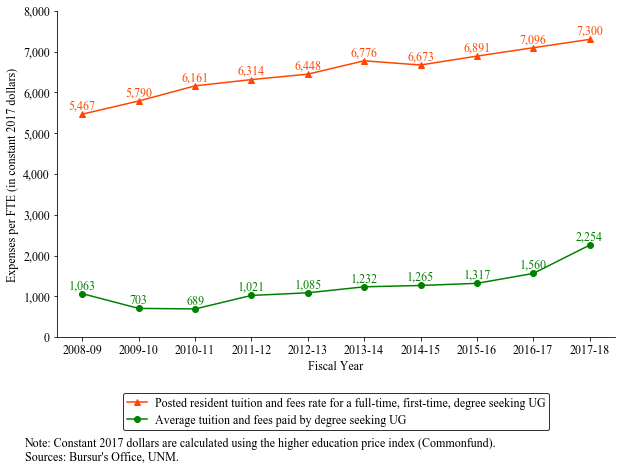

In [21]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
# line 1
ax.plot(df['year'], df['resident_tuition_fee'], 
       color = 'orangered',
      label='Posted resident tuition and fees rate for a full-time, first-time, degree seeking UG',
       marker = '^')
# annote
for x,y in zip(df['year'],df['resident_tuition_fee']): 
    label = "{:,.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                fontsize = 12,
                color = 'orangered')
# line 2
ax.plot(df['year'], df['average_TandF_paid'], 
       color = 'green',
       label = 'Average tuition and fees paid by degree seeking UG',
       marker = 'o')
# annote
for x,y in zip(df['year'],df['average_TandF_paid']): 
    label = "{:,.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                 fontsize = 12,
                color = 'green')

# formatting - labels
plt.ylabel('Expenses per FTE (in constant 2017 dollars)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('Fiscal Year', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 8000+1, 1000), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           ['2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'], 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center", 
           ncol=1, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note: Constant 2017 dollars are calculated using the higher education price index (Commonfund). \n Sources: Bursur\'s Office, UNM.'
plt.figtext(0.08, -0.155, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# put comman on y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig(dir+'\\figure9.png', bbox_inches = 'tight')

plt.show()

# Figure 10

In [22]:
data = {'year': [2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008], 
        'SCE': [16074, 16347, 15954, 15656, 15093, 14973, 16574, 14967, 14763],
        'average_TandF_paid' : [1560, 1317, 1265, 1232, 1085, 1021, 689, 703, 1063]}
df = pd.DataFrame(data, columns = ['year', 'SCE', 'average_TandF_paid'])

df

,year,SCE,average_TandF_paid
0,2016,16074,1560
1,2015,16347,1317
2,2014,15954,1265
3,2013,15656,1232
4,2012,15093,1085
5,2011,14973,1021
6,2010,16574,689
7,2009,14967,703
8,2008,14763,1063


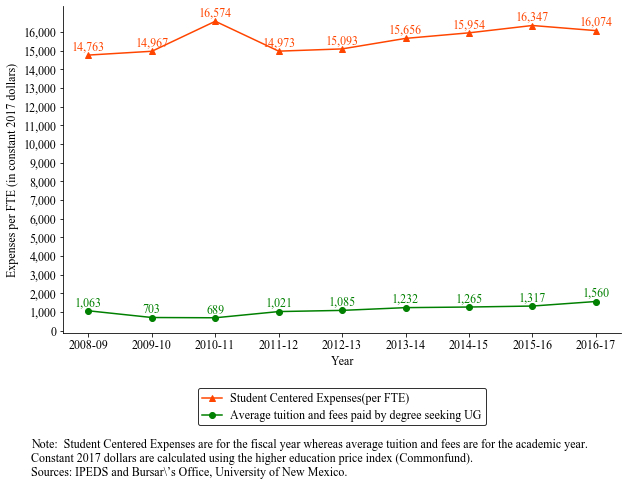

In [23]:
# making figure
fig, ax = plt.subplots(figsize=(10, 6))

# make graph
# line 1
ax.plot(df['year'], df['SCE'], 
       color = 'orangered',
      label='Student Centered Expenses(per FTE)',
       marker = '^')
# annote
for x,y in zip(df['year'],df['SCE']): 
    label = "{:,.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                fontsize = 12,
                color = 'orangered')
# line 2
ax.plot(df['year'], df['average_TandF_paid'], 
       color = 'green',
       label = 'Average tuition and fees paid by degree seeking UG',
       marker = 'o')
# annote
for x,y in zip(df['year'],df['average_TandF_paid']): 
    label = "{:,.0f}".format(y)
    plt.annotate(label,
                 (x,y), 
                 textcoords='offset points', 
                 xytext=(0,5), 
                 ha='center',
                fontfamily = 'Times New Roman',
                 fontsize = 12,
                color = 'green')

# formatting - labels
plt.ylabel('Expenses per FTE (in constant 2017 dollars)', fontsize = 12, family = 'Times New Roman')
plt.xlabel('Year', fontsize = 12, family = 'Times New Roman')

# axis
plt.yticks(np.arange(0, 16000+1, 1000), 
           fontsize = 12, 
           family = 'Times New Roman') #label of uni 
plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           ['2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'], 
           fontsize = 12, 
           family = 'Times New Roman')

# legend
leg = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="lower center", 
           ncol=1, edgecolor="black")
plt.setp(leg.get_texts(), fontsize =12, family = 'Times New Roman')

# notes
note = 'Note:  Student Centered Expenses are for the fiscal year whereas average tuition and fees are for the academic year. \n Constant 2017 dollars are calculated using the higher education price index (Commonfund). \n Sources: IPEDS and Bursar\’s Office, University of New Mexico.'
plt.figtext(0.08, -0.20, note, wrap=True, horizontalalignment='left', 
            fontsize=12, family = 'Times New Roman')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# put comman on y axis values
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig(dir+'\\figure10.png', bbox_inches = 'tight')

plt.show()